# Gold Extraction from Ore with Machine Learning

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import StandardScaler

state = np.random.RandomState(12345)

import warnings
warnings.filterwarnings('ignore')

## Prepare the Data

## Open the File and Look into the Data

In [2]:
#Import Data
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

In [3]:
display(df_train.head())
display(df_train.info())
display(df_train.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [4]:
display(df_train.duplicated().sum())

0

In [5]:
display(df_test.head())
display(df_test.info())
display(df_test.describe())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [6]:
display(df_test.duplicated().sum())

0

In [7]:
display(df_full.head())
display(df_full.info())
display(df_full.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [8]:
display(df_full.duplicated().sum())

0

Our data contains three datasets with. Dataset one and three, the train set and full set, contain 87 columns. Dataset two, the test set, has 53 columns. The train set has 16860 entries and the test set has 5856 entries. The full set has 22716 entries. Each dataset is missing values and there are no duplicate values.

### Check that Recovery is Calculated Correctly. Using the Training set, Calculate Recovery for the rougher.output.recovery Feature. Find the MAE Between your Calculations and the Feature Values. Provide Findings.

In [9]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [10]:
df_train['rougher.output.recovery_calculated'] = (C * (F - T)) / (F * (C - T)) * 100

mae_calc = pd.DataFrame({'calculated_recovery': df_train['rougher.output.recovery_calculated'], 'output_recovery': df_train['rougher.output.recovery']}).dropna()
mae = mean_absolute_error(mae_calc.calculated_recovery, mae_calc.output_recovery)
print('The MAE score is:', mae)

df_train.drop('rougher.output.recovery_calculated', axis=1, inplace=True)

The MAE score is: 9.444891926100695e-15


We have have a very small value for our mae score, this means the data in output recovery and calculated recovery are very similiar.

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [11]:
features_diff = list(set(df_train.columns).difference(df_test.columns))
display(features_diff)

['rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_au',
 'primary_cleaner.output.tail_au',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_pb',
 'final.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.concentrate_au',
 'final.output.tail_pb',
 'rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_ag',
 'final.output.tail_ag',
 'final.output.concentrate_pb',
 'rougher.output.recovery',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_pb',
 'fin

There are 34 features in the train dataset that are not included in the test dataset. The features not included in the test dataset are features containing the metals pb, ag, and au. The features include parameter types of output and calculation.

### Perform data preprocessing

In [12]:
#Check total missing values in each dataset
display(df_train.isna().sum().sum())
display(df_test.isna().sum().sum())
display(df_full.isna().sum().sum())

30320

2360

36587

In [13]:
#Fill in missing values
df_train = df_train.ffill()
df_test = df_test.ffill()
df_full = df_full.ffill()

In [14]:
#Check total missing values in each dataset
display(df_train.isnull().sum().sum())
display(df_test.isnull().sum().sum())
display(df_full.isnull().sum().sum())

0

0

0

In [15]:
#Change datatype in the date columns
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_full['date'] = pd.to_datetime(df_full['date'])

In [16]:
#Check datatype in date changed
display(df_train.dtypes)

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

We filled in missing values using the foward fill feature. We can use this method because our values are so similar. We changed datatype in the date columns of all three datasets.

## Analyze the Data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [17]:
metals = ['au', 'ag', 'pb']
parameters = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
colors = ['green', 'purple', 'blue']

# function to plot distribution of concentrations
def plot_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})
    for element in metals:
        plt.figure(figsize=(10,6), dpi=80)
        for features, colour in zip(parameters, colors):
            sns.distplot(df[features+'_'+element], color=colour, label=features+'_'+element, **kwargs)
            plt.axvline(0, c="r")
        plt.title('Distribution of ' +element+ ' concentrations across purification stage')
        plt.xlabel('Concentration of '+element)
        plt.legend();

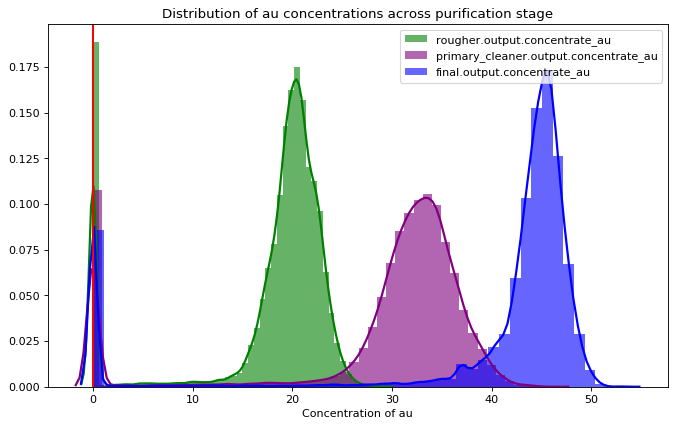

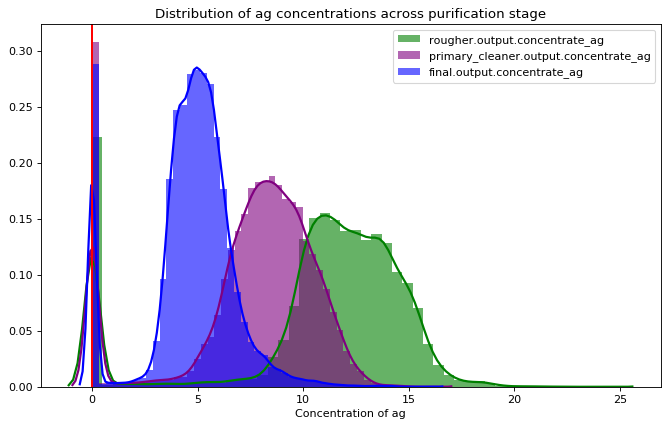

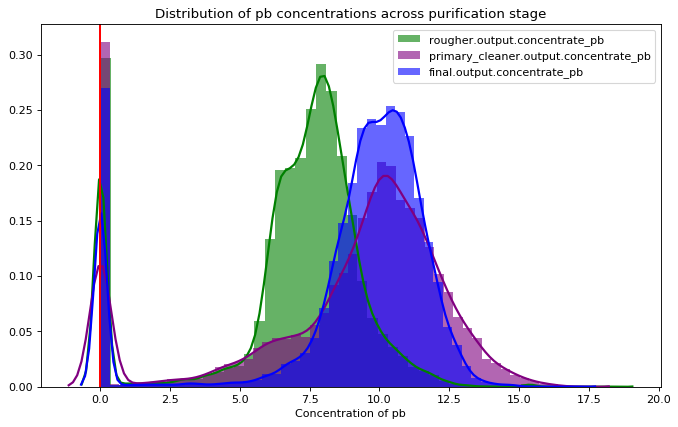

In [18]:
plot_distribution(df_full)

Based on our graphs the concentration of gold increase throughout the process of purification. The two other metals concentration either decreased or stayed the same throughout the process. This means the purification process is working.

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

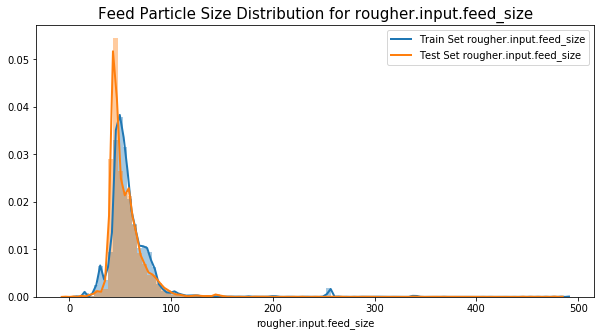

In [19]:
plt.figure(figsize=(10, 5))
plt.title('Feed Particle Size Distribution for rougher.input.feed_size',fontsize=15)
sns.distplot(df_train['rougher.input.feed_size'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Train Set rougher.input.feed_size"})
sns.distplot(df_test['rougher.input.feed_size'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Test Set rougher.input.feed_size"})

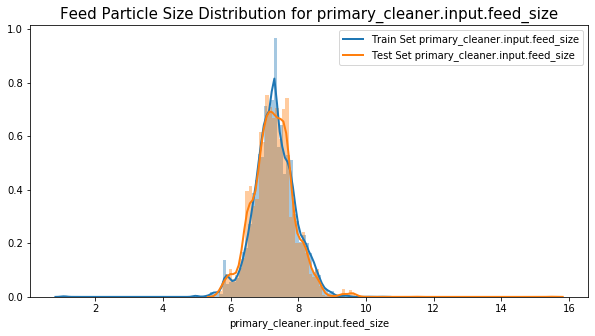

In [20]:
plt.figure(figsize=(10, 5))
plt.title('Feed Particle Size Distribution for primary_cleaner.input.feed_size',fontsize=15)
sns.distplot(df_train['primary_cleaner.input.feed_size'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Train Set primary_cleaner.input.feed_size"})
sns.distplot(df_test['primary_cleaner.input.feed_size'], 
             bins=100, kde=True, kde_kws={"lw": 2, "label": "Test Set primary_cleaner.input.feed_size"})

In [21]:
print('Average particle size for rougher input train set is {:.2f}'.format(df_train['rougher.input.feed_size'].mean()))
print('Average particle size for rougher input test set is {:.2f}'.format(df_test['rougher.input.feed_size'].mean()))
print()
print('Average particle size for primary cleaner input train set is {:.2f}'.format(df_train['primary_cleaner.input.feed_size'].mean()))
print('Average particle size for primary cleaner input test set is {:.2f}'.format(df_test['primary_cleaner.input.feed_size'].mean()))

Average particle size for rougher input train set is 60.19
Average particle size for rougher input test set is 55.90

Average particle size for primary cleaner input train set is 7.30
Average particle size for primary cleaner input test set is 7.26


We compared the feed particle size distribution for the train and test datasets. Our graphs show that the particle size distributions are similar in both the rougher.input.feed_size and primary_cleaner.input.feed_size. The average particle sizes for the train and test set are similiar. We can train our model without any problems.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [22]:
# rougher.input.feed
df_full['rougher_input_feed'] = (df_full['rougher.input.feed_ag'] + 
                                 df_full['rougher.input.feed_pb']+
                                 df_full['rougher.input.feed_sol']+
                                 df_full['rougher.input.feed_au'])


# rougher.ouput.concentrate
df_full['rougher_output_concentrate'] = (df_full['rougher.output.concentrate_ag'] + 
                                         df_full['rougher.output.concentrate_pb']+
                                         df_full['rougher.output.concentrate_sol']+
                                         df_full['rougher.output.concentrate_au'])


# final.output.concentrate
df_full['final_output_concentrate'] = (df_full['final.output.concentrate_ag']+
                                       df_full['final.output.concentrate_pb']+
                                       df_full['final.output.concentrate_sol']+
                                       df_full['final.output.concentrate_au'])

Text(0.5, 1.0, 'Distribution of total concentration in raw feed')

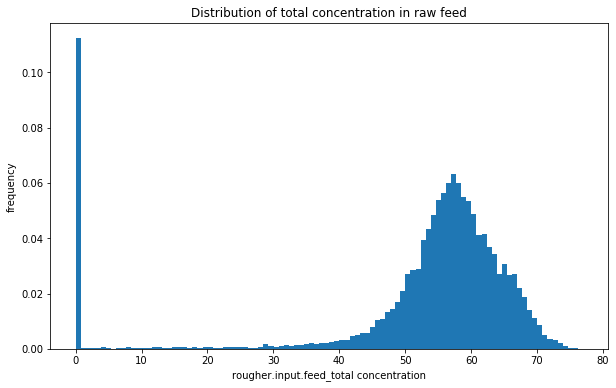

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df_full['rougher_input_feed'], density=True, bins=100)
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in raw feed")

Text(0.5, 1.0, 'Distribution of total concentration in raw feed')

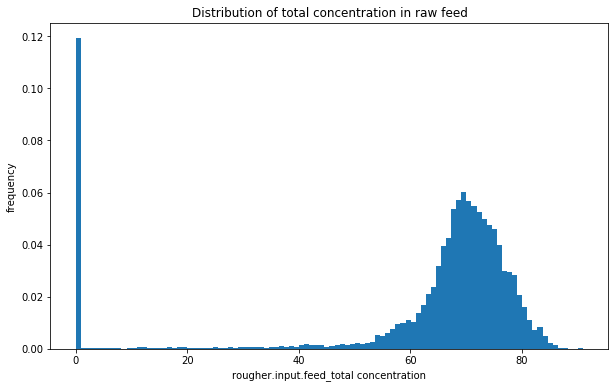

In [24]:
plt.figure(figsize=(10,6))
plt.hist(df_full['rougher_output_concentrate'], density=True, bins=100)
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in raw feed")

Text(0.5, 1.0, 'Distribution of total concentration in raw feed')

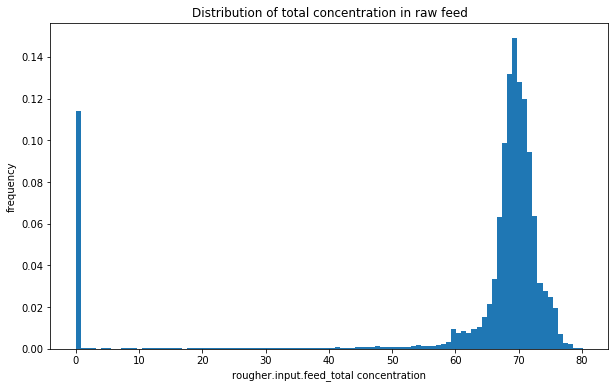

In [25]:
plt.figure(figsize=(10,6))
plt.hist(df_full['final_output_concentrate'], density=True, bins=100)
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in raw feed")

In [26]:
df_full_filtered = df_full[(df_full['rougher_input_feed'] > 1) &
                           (df_full['rougher_output_concentrate'] > 1) &
                           (df_full['final_output_concentrate'] > 1)]

df_full_filtered.shape

(19902, 90)

In [27]:
df_test.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)
df_full_filtered.set_index('date', inplace=True)

In [28]:
df_train_data_index = df_full_filtered.index.intersection(df_train.index)
df_train_data_index.shape

(14612,)

In [29]:
df_train_filtered = df_full_filtered.loc[df_train_data_index]
df_train_filtered.reset_index(inplace=True)
df_train_filtered.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_feed,rougher_output_concentrate,final_output_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


In [30]:
df_test_data_index = df_full_filtered.index.intersection(df_test.index)
df_test_data_index.shape

(5290,)

In [31]:
df_test_filtered = df_full_filtered.loc[df_test_data_index]
df_test_filtered.reset_index(inplace=True)
df_test_filtered.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_feed,rougher_output_concentrate,final_output_concentrate
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,72.871822,79.939838,70.779504
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,71.669225,81.118880,70.215454
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,73.202598,79.267044,71.085315
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,70.757057,81.335254,71.421253
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,68.654396,80.902631,71.031520


We observed from our graphs that the concentration of gold(au) increased throughout the purification process. While, the other metals, Ag and Pb, decreased or remained the same. This showed that the process is performing as designed. We compared feed particle size distributions in the traing and test sets. The distributions were similar. We checked if there were any abnormal vaules in the total distribution of concentration throughout different stages. We did find a peak in total concentration at 0. We removed all the data with total concentration below 1 from all data sets. Our data is now prepared for the model.

## Build the Model

### Write a function to calculate the final sMAPE value.

In [32]:
#sMAPE function
def smape(y_target, y_predict):
    smape = (1/len(y_target)) * (np.sum(abs(y_target - y_predict)/((abs(y_target) + abs(y_predict))/2))) * 100
    return smape

#final sMAPE function
def final_smape(y_target, y_predict):
    smape_out_rougher = smape(y_target[:,0], y_predict[:,0])
    smape_out_final = smape(y_target[:,1], y_predict[:,1])
    return ((0.25 * smape_out_rougher) + (0.75 * smape_out_final))

smape_score = make_scorer(final_smape)

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [43]:
#create target and features values for train dataset
features_train = df_train_filtered.drop(features_diff, axis=1)
features_train = features_train.drop(['date'], axis=1)
target_train = df_train_filtered[['rougher.output.recovery', 'final.output.recovery']]

#create target and features values for test dataset
features_test = df_test_filtered.drop(features_diff, axis=1)
features_test = features_test.drop(['date'], axis=1)
target_test = df_test_filtered[['rougher.output.recovery', 'final.output.recovery']]

display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)
display(features_train.head())

(14612, 55)

(14612, 2)

(5290, 55)

(5290, 2)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_feed,rougher_output_concentrate,final_output_concentrate
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


In [34]:
# features scaling
scaler = StandardScaler()
scaler.fit(features_train)
# transform the training set and the test set
features_train = scaler.transform(features_train)
features_test  = scaler.transform(features_test)

# target data as numpy array
target_train = target_train.values
target_test = target_test.values

In [35]:
#baseline model using a dummy regressor
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(features_train, target_train)
dummy_predict_test = dummy_model.predict(features_test)
print('The final sMAPE score is: {:.2f}'.format(final_smape(target_test, dummy_predict_test)))

display(cross_val_score(dummy_model, features_train, target_train, cv=5, scoring=smape_score))

The final sMAPE score is: 8.33


array([11.38690975,  9.23761691,  9.03425718, 11.09053777, 11.67784523])

In [36]:
#Linear Regression
lr_model = LinearRegression() 
lr_model.fit(features_train,target_train)
lr_predict_test = lr_model.predict(features_test)
print('The final sMAPE score is: {:.2f}'.format(final_smape(target_test, lr_predict_test)))

display(cross_val_score(lr_model, features_train, target_train, cv=5, scoring=smape_score))

The final sMAPE score is: 8.00


array([13.46735629,  9.81558706,  9.66610138,  8.99007789, 13.83289772])

In [37]:
#Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=state)
dt_model.fit(features_train,target_train)
dt_predict_test = dt_model.predict(features_test)
print('The final sMAPE score is: {:.2f}'.format(final_smape(target_test, dt_predict_test)))

display(cross_val_score(dt_model, features_train, target_train, cv=5, scoring=smape_score))

The final sMAPE score is: 13.37


array([        nan, 16.78779361,         nan,         nan, 15.9736104 ])

In [38]:
#Decision Tree Regression with hyperparameter tuning
for depth in range(1, 10):
    dt_model = DecisionTreeRegressor(random_state=state, max_depth = depth)
    dt_model.fit(features_train,target_train)
    cross_val_dt = cross_val_score(dt_model, features_train, target_train, cv=5, scoring=smape_score)
    print('max_depth =', depth, ': ', end='')
    print('final smape', cross_val_dt.mean())

max_depth = 1 : final smape 10.100678154145717
max_depth = 2 : final smape 9.963904243936602
max_depth = 3 : final smape 9.997223297039138
max_depth = 4 : final smape 10.01609217056667
max_depth = 5 : final smape 10.02851361615043
max_depth = 6 : final smape nan
max_depth = 7 : final smape nan
max_depth = 8 : final smape nan
max_depth = 9 : final smape nan


In [39]:
#Decision Tree Regression with max depth 2
dt_model = DecisionTreeRegressor(random_state=state, max_depth = 2)
dt_model.fit(features_train,target_train)
dt_predicted_test = dt_model.predict(features_test)
print('The final sMAPE score is: {:.2f}'.format(final_smape(target_test, dt_predicted_test)))

display(cross_val_score(dt_model, features_train, target_train, cv=5, scoring=smape_score))

The final sMAPE score is: 7.08


array([10.86441777,  8.69090879,  9.71798766,  9.10861538, 11.43759162])

In [40]:
#Random Forest Regression
rf_model = RandomForestRegressor(random_state=state)
rf_model.fit(features_train,target_train)
rf_predict_test = rf_model.predict(features_test)
print('The final sMAPE score is: {:.2f}'.format(final_smape(target_test, rf_predict_test)))

display(cross_val_score(rf_model, features_train, target_train, cv=5, scoring=smape_score))

The final sMAPE score is: 8.77


array([11.76070454,  9.19382392,  9.55918667, 10.60036234, 10.84965579])

In [41]:
#Random Forest Regression with hyperparameter tuning
for n in range(1, 60, 10):
    rf_model = RandomForestRegressor(random_state=state, n_estimators = n)
    rf_model.fit(features_train,target_train)
    cross_val_rf = cross_val_score(rf_model, features_train, target_train, cv=5, scoring=smape_score)
    print('n_estimator =', n, ': ', end='')
    print('final smape', cross_val_rf.mean())

n_estimator = 1 : final smape nan
n_estimator = 11 : final smape 10.069141809551256
n_estimator = 21 : final smape 9.571703253070035
n_estimator = 31 : final smape 9.816976350150913
n_estimator = 41 : final smape 9.565955521110721
n_estimator = 51 : final smape 9.631623616705477


In [42]:
#Random Forest Regression with n_estimators of 41
rf_model = RandomForestRegressor(random_state=state, n_estimators = 41)
rf_model.fit(features_train,target_train)
rf_predicted_test = rf_model.predict(features_test)
print('The final sMAPE score is: {:.2f}'.format(final_smape(target_test, rf_predicted_test)))

display(cross_val_score(rf_model, features_train, target_train, cv=5, scoring=smape_score))

The final sMAPE score is: 7.72


array([10.73874616,  8.18622851,  8.43385775,  9.6937745 , 10.82737587])

The best model for our data was the decision tree regression model with a max depth 2. The final sMAPE value was 7.08. Hyperparameters tuning helped both random forest regression model and decision tree regression model have a better sMAPE value.

## Conclusion

We were give three datasets to upload and prepare. The full set, df_full contains 22716 row and 86 columns. The train set, df_train contains 16860 rows and 86 columns. The test set, df_test contains 5856 rows and 52 columns. Each dataset has many missing values and no duplicates. We replaced missing values by using the fill foward method since data is all so close in value.

By analyzing different metals across the purification stage, we observed that gold increased in concentration while other metals decreased or stayed the same. This shows the purification process is working accurately. We observed that the feed particle size distributions are similar in both the test and train sets. We removed anomalies from the data that were caused by an abnormal spike in total cocentration at 0. 

We tested different models to find the best final sMAPE value. We found that the best model was the decision tree regression model with a max depth of 2. Our final sMAPE value was 7.08. The model was able to optimize gold production.